Data Visualization: 
https://www.youtube.com/watch?v=qLiEDvs57nk

In [0]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/movies.csv'
filmes = pd.read_csv(uri) # data frame
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes = filmes.join(filmes['generos'].str.get_dummies()).drop('generos', axis=1)
filmes['ano'] = filmes['titulo'].str.extract(r'.*\((\d+)\)')
filmes = filmes.dropna()

In [2]:
filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano
filmeId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1995


In [0]:
uri = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/ratings.csv'
notas = pd.read_csv(uri)
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
arredondadas = notas['nota'].round(1)
#notas.head()

In [4]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:

medias = notas.groupby('filmeId')['nota'].mean()
filmes = filmes.join(medias).dropna().sort_values('nota', ascending=False).rename(columns={'nota' : 'media'})

total = notas.groupby('filmeId')['momento'].count()
filmes = filmes.join(total)
filmes = filmes.rename(columns={'momento' : 'total'})
filmes = filmes.query('total > 50')
filmes['media_categoria'] = (filmes['media']).round(1).values

random_filmes = filmes.sample(10)
# random_filmes.head()

In [6]:
filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
filmeId,,,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1994,4.429022,317,4.4
858,"Godfather, The (1972)",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1972,4.289062,192,4.3
2959,Fight Club (1999),0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1999,4.272936,218,4.3
1276,Cool Hand Luke (1967),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1967,4.271930,57,4.3
750,Dr. Strangelove or: How I Learned to Stop Worr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1964,4.268041,97,4.3


In [7]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
random_filmes

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
filmeId,,,,,,,,,,,,,,,,,,,,,,,,,
1580,Men in Black (a.k.a. MIB) (1997),0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1997,3.487879,165,3.5
63082,Slumdog Millionaire (2008),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,2008,3.809859,71,3.8
2012,Back to the Future Part III (1990),0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1990,3.369318,88,3.4
69844,Harry Potter and the Half-Blood Prince (2009),0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,2009,3.887931,58,3.9
3253,Wayne's World (1992),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1992,3.475410,61,3.5
35836,"40-Year-Old Virgin, The (2005)",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2005,3.547297,74,3.5
288,Natural Born Killers (1994),0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1994,3.233696,92,3.2
7143,"Last Samurai, The (2003)",0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2003,3.903226,62,3.9
912,Casablanca (1942),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1942,4.240000,100,4.2


In [10]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f157cff2828>,
      dtype=object)

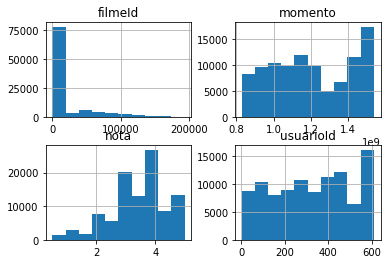

In [12]:
notas.hist()

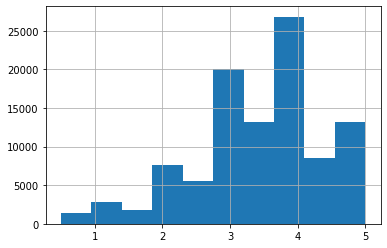

In [11]:
notas['nota'].hist()

In [13]:
arredondadas.sample(5)

51696    3.0
32555    4.5
24591    3.0
84939    4.0
47054    2.5
Name: nota, dtype: float64

In [14]:
arredondadas.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

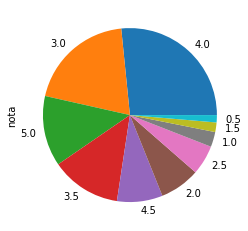

In [15]:
# Pie não muito indicado
arredondadas.value_counts().plot.pie()

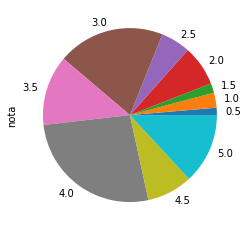

In [19]:
arredondadas.value_counts().to_frame().reset_index().sort_values('index').set_index('index')['nota'].plot.pie()

In [0]:
import seaborn as sns



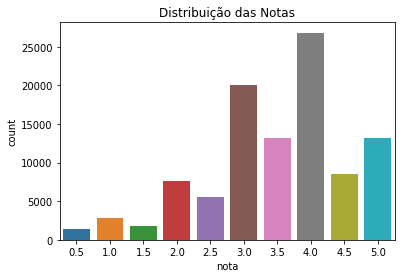

In [22]:
import matplotlib.pyplot as plt # colocar um título

sns.countplot(arredondadas)
plt.title('Distribuição das Notas');

Choosing color palettes: 
https://seaborn.pydata.org/tutorial/color_palettes

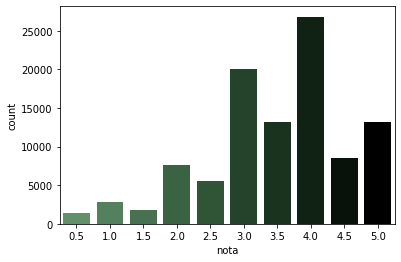

In [27]:
palette = sns.color_palette('Blues', 10) # op 1
palette = sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.5) # 0p 2
sns.countplot(arredondadas, palette=palette)

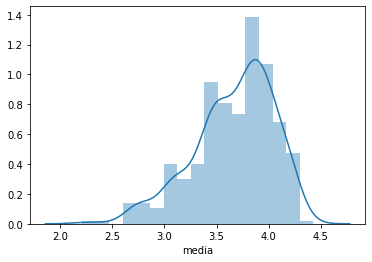

In [29]:
# Distribuição da média dos filmes:
sns.distplot(filmes['media'])

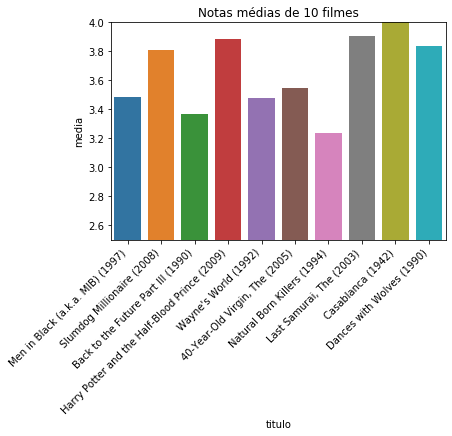

In [40]:
p = sns.barplot(data = random_filmes, x = 'titulo', y = 'media')
p.set_xticklabels(p.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Notas médias de 10 filmes')
plt.ylim(2.5, 4)
plt.show()

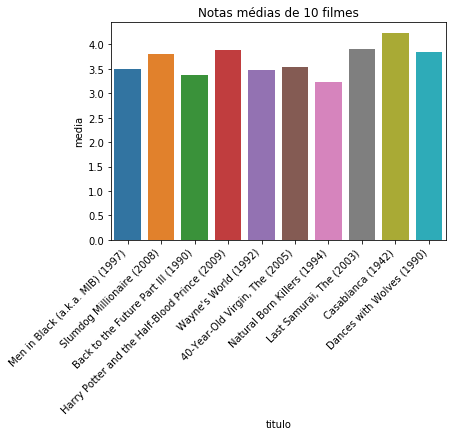

In [41]:
p = sns.barplot(data = random_filmes, x = 'titulo', y = 'media')
p.set_xticklabels(p.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Notas médias de 10 filmes')
plt.show()

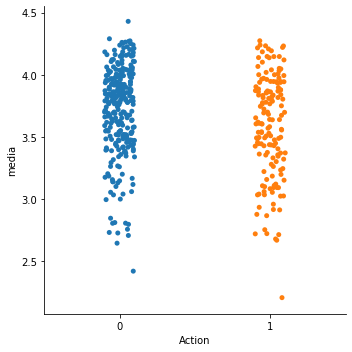

In [42]:
sns.catplot(data = filmes, x = 'Action', y = 'media')

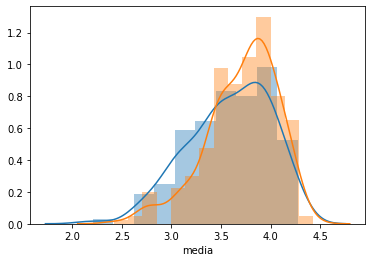

In [44]:
sns.distplot(filmes.query('Action == 1')['media'])
sns.distplot(filmes.query('Action == 0')['media'])

In [50]:
ids_aleatorios = ','.join(random_filmes.index.values.astype(str))
query = f'filmeId in ({ids_aleatorios})'
#sns.boxplot(data = notas.query('filmeId in ()'))
query

'filmeId in (1580,63082,2012,69844,3253,35836,288,7143,912,590)'

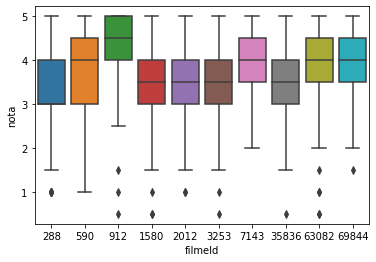

In [55]:
sns.boxplot(data = notas.query(query), x = 'filmeId', y = 'nota')
plt.show()

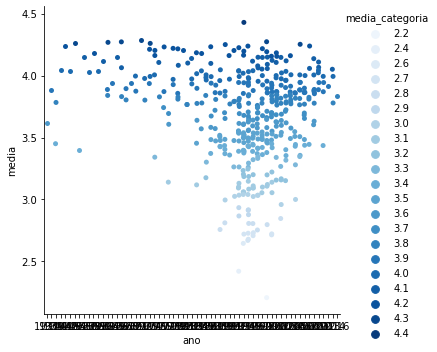

In [59]:
total_de_categorias =  len(filmes['media_categoria'].unique())
sns.catplot(data=filmes, x='ano', y='media', palette = sns.color_palette('Blues', total_de_categorias), hue = 'media_categoria')

https://seaborn.pydata.org/tutorial.html